# Ian Rabago - PHYS 404, HW 6

<h3> Gravitational potential from a line mass </h3>

<p> The line mass is positioned at the origin(x=0, y=0) and has symmetry along the z-axis. The Laplacian for gravitational fields is </p>

<h3> $\nabla^2 \Phi = 4 \pi G \rho,   G=1$ </h3>

<p> Using the symmetry about the Z-axis, the Laplacian can be expressed as: </p>

<h3> $\nabla^2 \Phi = \frac{\partial^2 \Phi}{\partial x^2} + \frac{\partial^2 \Phi}{\partial y^2}$ </h3>

<p> The only other boundary conditions imposed are that the potential V(x,y) is 0 at the edges. </p>

Stopped at iteration # 472


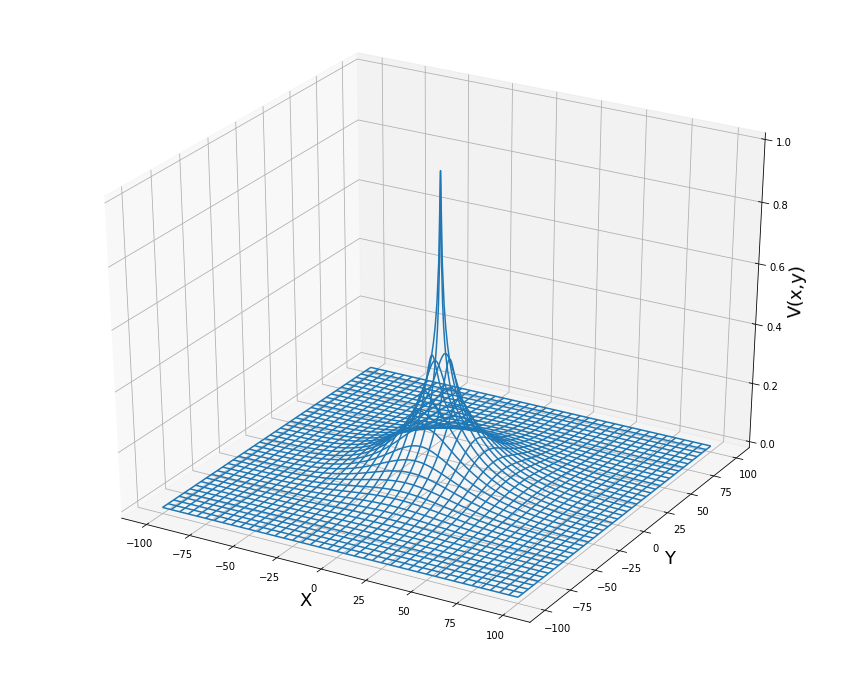

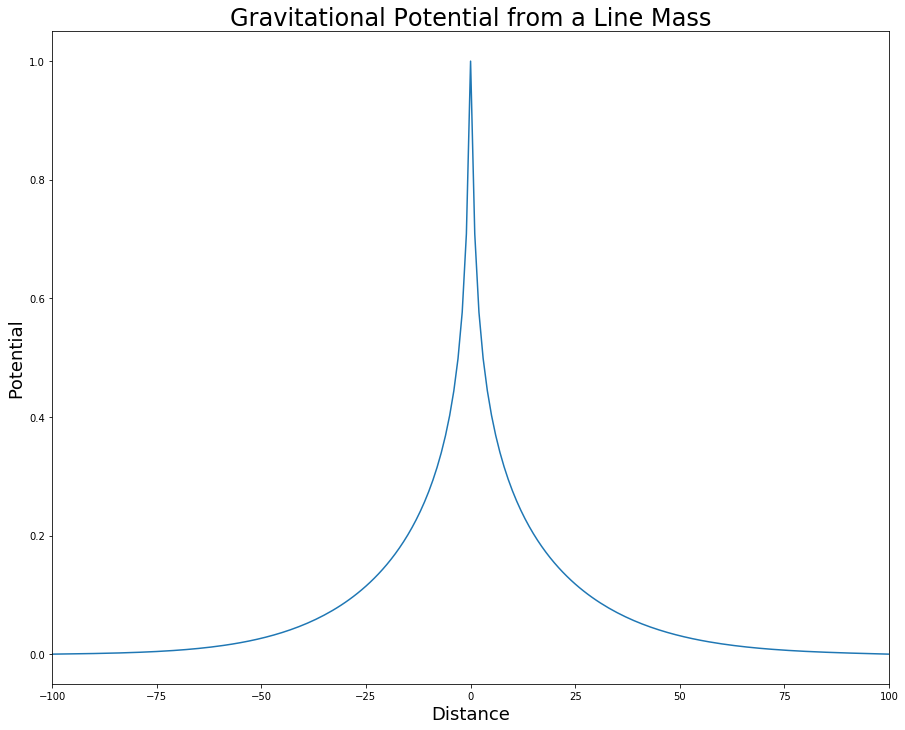

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N_points = 201
iterations = 1000

G = 1
rho = 1
omega = 1.5


V = np.zeros((N_points, N_points))
#Set boundary contitions (voltages)
#Note that the edges are already set to zero.
V[100, 100] = 1

#Iteration of the relaxation method, using over-relaxation.
for n in range(iterations):
    err_max = 0

    for i in range(1, N_points-1):
        for j in range(1, N_points-1):
            if (i != 100 or j != 100):
                #Calculates the Laplacian based on the 5-point lattice. Should equal 4*pi*G*rho
                du = 0.25*(V[i, j-1]+V[i, j+1]+V[i-1, j]+V[i+1, j]) - V[i,j]
                #Resets maximum error if needed.
                if (err_max < np.abs(du)):
                    err_max = du

                V[i,j] += omega*du
            
    #Stops iterating if the minimum error is bellow 0.0001 (tolerance)
    if (err_max < 1.0e-4):
        print("Stopped at iteration #", n+1)
        break

#Graphing setup.
x, y = np.arange(0, 201), np.arange(0, 201)
X, Y = np.meshgrid(x, y)             #Creates the XY grid.
Z = V[X, Y]                          #Sets the Z-grid to the calculated potential.
X, Y = np.meshgrid(x-100, y-100)     #Recenters the XY grid so the mass is at the origin.

#Plots the potential as a 3D mesh.
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18)
ax.set_zlabel("V(x,y)", fontsize=18)
ax.plot_wireframe(X, Y, Z)
#ax.view_init(azim=180, elev=0)
plt.show()


fig = plt.figure(figsize=(15, 12))
x1 = [i-100 for i in range(N_points)]
y1 = [V[100,i] for i in range(N_points)]


plt.plot(x1, y1)
plt.title("Gravitational Potential from a Line Mass", fontsize=24)
plt.xlabel("Distance", fontsize=18)
plt.ylabel("Potential", fontsize=18)
plt.xlim(-100, 100)
plt.show()

<p> The radial dependence of the potential can be compared to the expected dependence of</p>

<h3> $V(r) \sim 2G \mu ln(r) + C$ </h3>

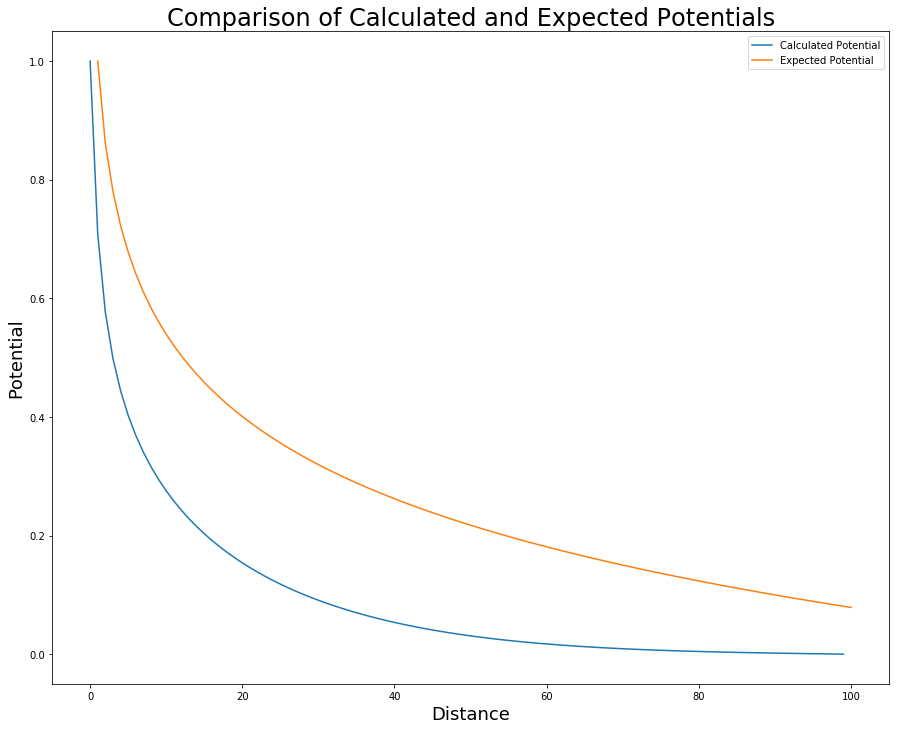

In [53]:
mu = 0.1

x1 = [i for i in range(100)]
y1 = [V[100, 100+i] for i in range(100)]
x2 = [i+1 for i in range(100)]
y2 = [-2*G*mu*np.log(i+1)+1 for i in range(100)]

fig = plt.figure(figsize=(15, 12))
plt.plot(x1, y1, label="Calculated Potential")
plt.plot(x2, y2, label="Expected Potential")

plt.xlabel("Distance", fontsize=18)
plt.ylabel("Potential", fontsize=18)
plt.title("Comparison of Calculated and Expected Potentials", fontsize=24)
plt.legend()
plt.show()